<a href="https://colab.research.google.com/github/fboldt/aulas-am-bsi/blob/main/aula16a_perceptron.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [101]:
import numpy as np

def create_dataset(n=20):
  X = np.random.uniform(size=(n,2))
  y = np.array(X[:,0]>X[:,1], dtype=int)*2-1
  return X, y

X, y = create_dataset()
print(y)

[-1 -1  1  1  1  1 -1 -1  1  1  1 -1  1  1  1 -1 -1 -1  1 -1]


In [98]:
from matplotlib.colors import LinearSegmentedColormap
colors = [(1, 0, 0), (0, 1, 0), (0, 0, 1)]
crgb = LinearSegmentedColormap.from_list('custom_cmap', colors)

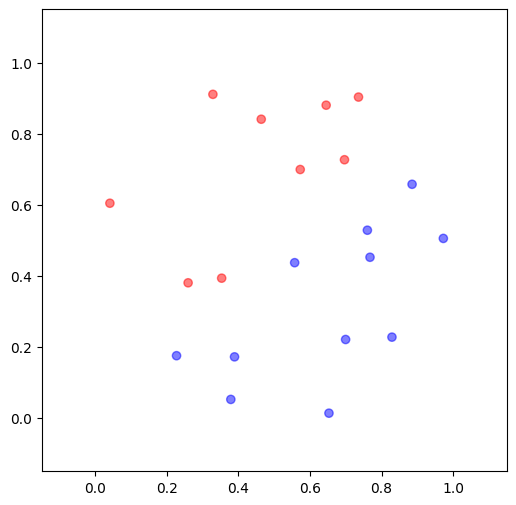

In [102]:
import matplotlib.pyplot as plt

def plot_dataset(X, y, xlim=(-0.15, 1.15), ylim=(-0.15, 1.15)):
  plt.figure(figsize=(6,6))
  plt.scatter(X[:,0], X[:,1], c=y, alpha=0.5, cmap=crgb)
  plt.xlim(*xlim)
  plt.ylim(*ylim)

plot_dataset(X, y)
plt.show()

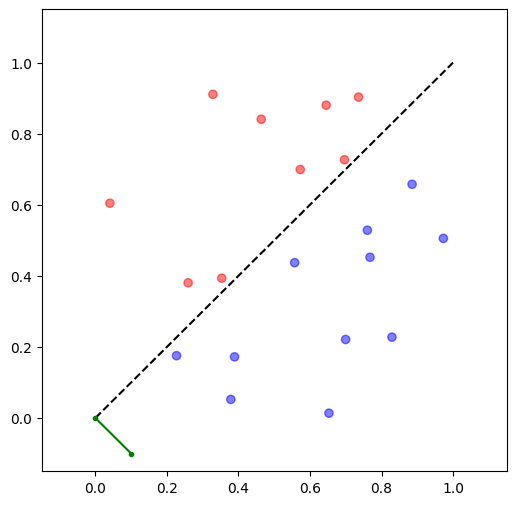

In [103]:
def plot_hyperplan(vector, xs=[0,1]):
  xs = np.array(xs)
  ys = -(vector[0]*xs)/vector[1]
  plt.plot(xs, ys, 'k--')

vector = [0.1,-0.1]
plot_dataset(X, y)
plot_hyperplan(vector)
plt.plot([0,vector[0]],[0,vector[1]], 'g.-')
plt.show()

In [111]:
from sklearn.base import BaseEstimator, ClassifierMixin
from sklearn.metrics import accuracy_score

class DummyClassifier(BaseEstimator, ClassifierMixin):
  def fit(self, X, y=None):
    self.classes_ = np.unique(y)
    return self

  def predict(self, X):
    # ypred = np.random.choice(self.classes_, len(X))
    # ypred = np.array(X[:,0]>X[:,1], dtype=int)
    w = np.array([0.1, -0.1])
    ypred = np.sign(X @ w)
    return np.array(ypred, dtype=int)

  def score(self, X, y):
    ypred = self.predict(X)
    return accuracy_score(y, ypred)

clf = DummyClassifier()
clf.fit(X, y)
ypred = clf.predict(X)
print(ypred)
print(y)
print(clf.score(X, y))

[-1 -1  1  1  1  1 -1 -1  1  1  1 -1  1  1  1 -1 -1 -1  1 -1]
[-1 -1  1  1  1  1 -1 -1  1  1  1 -1  1  1  1 -1 -1 -1  1 -1]
1.0


#PLA - Perceptron Learning Algorithm

In [125]:
class PLA(BaseEstimator, ClassifierMixin):
  def __init__(self, max_iter=100):
    self.max_iter = max_iter

  def fit(self, X, y):
    self.w_ = np.zeros(X.shape[1])
    for _ in range(self.max_iter):
      cost = 0
      idx = np.arange(X.shape[0])
      np.random.shuffle(idx)
      for i in idx:
        ypred = self.predict([X[i]])
        error = y[i] - ypred[0]
        if error:
          self.w_ += error * X[i]
          cost += error**2
      if cost == 0:
        break
      ypred = self.predict([X[idx]])

  def predict(self, X):
    ypred = np.sign(X @ self.w_)
    return np.array(ypred, dtype=int)

model = PLA()
model.fit(X, y)
print(model.w_)
ypred = model.predict(X)
print(ypred)
print(y)
print(model.score(X, y))

[ 3.24781059 -3.97687927]
[-1 -1  1  1  1  1 -1 -1  1  1  1 -1  1  1  1 -1 -1 -1  1 -1]
[-1 -1  1  1  1  1 -1 -1  1  1  1 -1  1  1  1 -1 -1 -1  1 -1]
1.0


[ 2.03500929 -1.97270308]


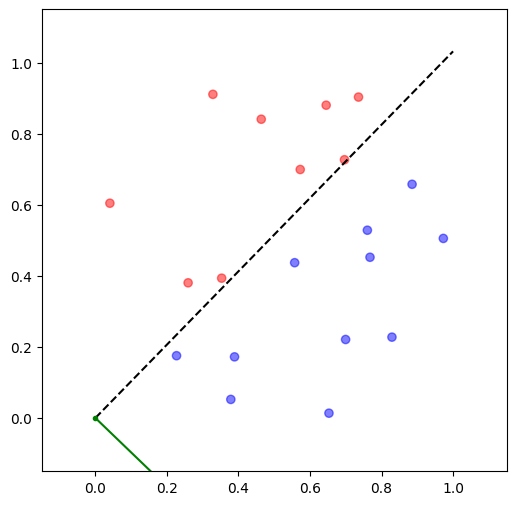

In [132]:
model = PLA()
model.fit(X, y)
print(model.w_)

vector = model.w_
plot_dataset(X, y)
plot_hyperplan(vector)
plt.plot([0,vector[0]],[0,vector[1]], 'g.-')
plt.show()